In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from typing import Optional, Literal, Callable
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from torchvision.transforms import v2 as T # type: ignore

from geovision.config import ExperimentConfig
from geovision.data.module import ImageDatasetDataModule

transforms = {
    "transform": {
        "image_transform": None,
        "target_transform": None,
        "commmon_transform": None
    }
}

dm = ImageDatasetDataModule(
    config = ExperimentConfig.from_yaml(Path.cwd()/"config.yaml", transforms),
)
dm.setup("test")

In [3]:
# dm.test_dataset

In [56]:
from typing import Optional

import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm

DATA = Path.home() / "datasets" / "so2sat_pop"
LOC_DIRS = list((DATA/"train").iterdir()) + list((DATA/"test").iterdir())

def _get_file_path(row, subdir) -> Path:
    match subdir.name:
        case "osm":
            file_extn = "osm"
        case "osm_features":
            file_extn = "csv"
        case _:
            file_extn = "tif"
    return subdir/f"Class_{row["label_idx"]}"/f"{row["grd_id"]}_{subdir.name}.{file_extn}"

def _get_loc_df(loc_dir) -> pd.DataFrame:
    return (
        pd.read_csv(loc_dir/f"{loc_dir.name}.csv")
        .set_axis(["grd_id", "label_idx", "pop"], axis = "columns")
        .assign(loc = loc_dir.name.split('_')[-1])
        .assign(split = loc_dir.parent.name)
        .sort_values("label_idx")
        .assign(sen2autumn_path = lambda df: df.apply(
            lambda x: _get_file_path(x, loc_dir/"sen2autumn"), axis = 1))
        .assign(sen2spring_path = lambda df: df.apply(
            lambda x: _get_file_path(x, loc_dir/"sen2spring"), axis = 1))
        .assign(sen2summer_path = lambda df: df.apply(
            lambda x: _get_file_path(x, loc_dir/"sen2summer"), axis = 1))
        .assign(sen2winter_path = lambda df: df.apply(
            lambda x: _get_file_path(x, loc_dir/"sen2winter"), axis = 1))
        .assign(viirs_path = lambda df: df.apply(
            lambda x: _get_file_path(x, loc_dir/"viirs"), axis = 1))
        .assign(lu_path = lambda df: df.apply(
            lambda x: _get_file_path(x, loc_dir/"lu"), axis = 1))
        .assign(lcz_path = lambda df: df.apply(
            lambda x: _get_file_path(x, loc_dir/"lcz"), axis = 1))
        .assign(dem_path = lambda df: df.apply(
            lambda x: _get_file_path(x, loc_dir/"dem"), axis = 1))
        .assign(osm_path = lambda df: df.apply(
            lambda x: _get_file_path(x, loc_dir/"osm"), axis = 1))
        .assign(osm_features_path = lambda df: df.apply(
            lambda x: _get_file_path(x, loc_dir/"osm_features"), axis = 1))
    )

df = pd.concat([_get_loc_df(loc_dir) for loc_dir in LOC_DIRS], axis = 0)
display(df)

,grd_id,label_idx,pop,loc,split,sen2autumn_path,sen2spring_path,sen2summer_path,sen2winter_path,viirs_path,lu_path,lcz_path,dem_path,osm_path,osm_features_path
0,127,0,0,bologna,train,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...
1,333,0,0,bologna,train,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...
2,336,0,0,bologna,train,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...
3,360,0,0,bologna,train,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...
4,388,0,0,bologna,train,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...,/home/sambhav/datasets/so2sat_pop/train/00645_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,1kmN2276E5407,15,18309,sofia,test,/home/sambhav/datasets/so2sat_pop/test/00384_2...,/home/sambhav/datasets/so2sat_pop/test/00384_2...,/home/sambhav/datasets/so2sat_pop/test/00384_2...,/home/sambhav/datasets/so2sat_pop/test/00384_2...,/home/sambhav/datasets/so2sat_pop/test/00384_2...,/home/sambhav/datasets/so2sat_pop/test/00384_2...,/home/sambhav/datasets/so2sat_pop/test/00384_2...,/home/sambhav/datasets/so2sat_pop/test/00384_2...,/home/sambhav/datasets/so2sat_pop/test/00384_2...,/home/sambhav/datasets/so2sat_pop/test/00384_2...
832,1kmN2277E5407,15,18462,sofia,test,/home/sambhav/datasets/so2sat_pop/test/00384_2...,/home/sambhav/datasets/so2sat_pop/test/00384_2...,/home/sambhav/datasets/so2sat_pop/test/00384_2...,/home/sambhav/datasets/so2sat_pop/test/00384_2...,/home/sambhav/datasets/so2sat_pop/test/00384_2...,/home/sambhav/datasets/so2sat_pop/test/00384_2...,/home/sambhav/datasets/so2sat_pop/test/00384_2...,/home/sambhav/datasets/so2sat_pop/test/00384_2...,/home/sambhav/datasets/so2sat_pop/test/00384_2...,/home/sambhav/datasets/so2sat_pop/test/00384_2...
773,1kmN2274E5404,15,19549,sofia,test,/home/sambhav/datasets/so2sat_pop/test/003

In [5]:
# print(df[["split", "loc"]].value_counts().sort_index().to_string())

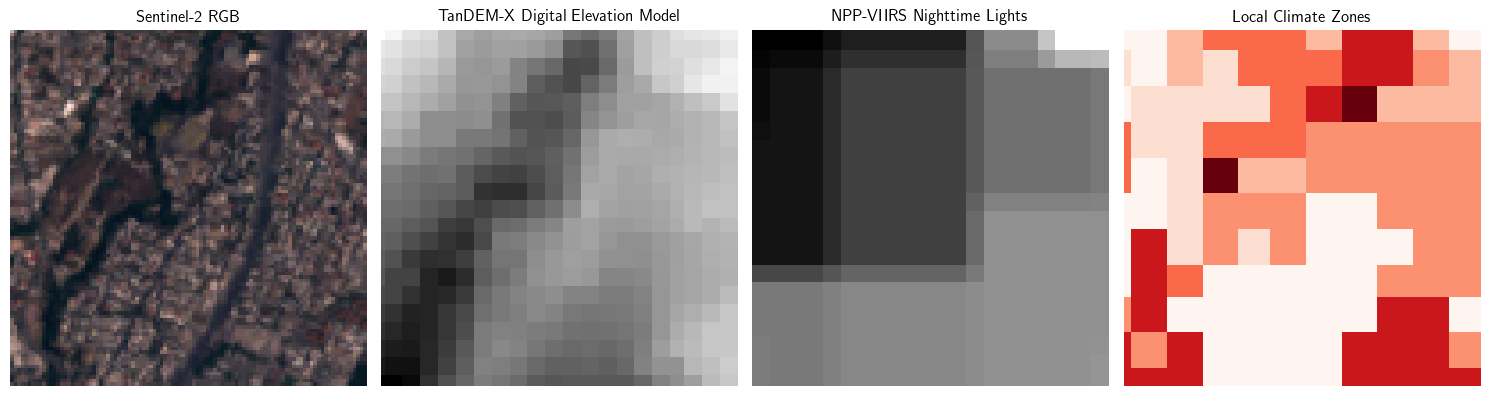

In [61]:
import numpy as np
import rasterio as rio
import imageio.v3 as iio
import matplotlib.pyplot as plt

def get_minmax_scaled_image(image):
    return (image - image.min()) / (image.max() - image.min()).astype(np.float32)

plt.rcParams["text.usetex"] = True
fig, ax = plt.subplots(1, 4, figsize = (15, 15), tight_layout = True)
indices = (122035, 99545, 59702) #120565, 127951, 
#for i, ax in enumerate(axes):
row = df.iloc[indices[2]] 
sen2ms = iio.imread(row["sen2summer_path"])
sen2rgb = np.dstack([sen2ms[:, :, b] for b in range(3, 0, -1)])
sen2rgb = get_minmax_scaled_image(sen2rgb) 
dem = iio.imread(row["dem_path"])
viirs = iio.imread(row["viirs_path"])
lcz = iio.imread(row["lcz_path"])

ax[0].imshow(sen2rgb)
ax[0].set_title("Sentinel-2 RGB")
ax[0].axis("off")

ax[1].imshow(dem, cmap = "grey")
ax[1].set_title("TanDEM-X Digital Elevation Model")
ax[1].axis("off")

ax[2].imshow(viirs, cmap = "grey")
ax[2].set_title("NPP-VIIRS Nighttime Lights")
ax[2].axis("off")

ax[3].imshow(lcz, cmap = "Reds")
ax[3].set_title("Local Climate Zones")
ax[3].axis("off")
#plt.tight_layout(w_pad = 0.5)
fig.savefig("so2sat_pop_dataset_59702.png")


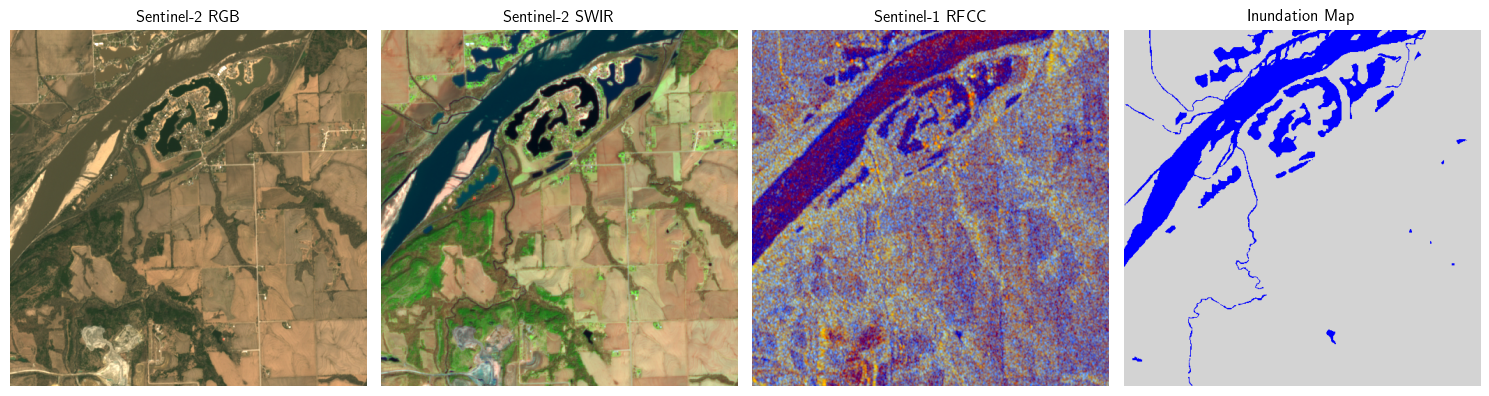

In [88]:
DATA = Path.home() / "datasets" / "sen12flood"
Sen2Patch = Path("/home/sambhav/datasets/c2smsfloods/ms-dataset-chips/55d43c77-9955-4b4f-b6f0-b21e7f50a039/s2/20190331T170901_20190331T171131_T14TQL_04096-05120")
Sen1Patch = Path("/home/sambhav/datasets/c2smsfloods/ms-dataset-chips/55d43c77-9955-4b4f-b6f0-b21e7f50a039/s1/S1A_IW_GRDH_1SDV_20190404T002124_20190404T002149_026633_02FCE5_A8E7_04096-05120")

fig, ax = plt.subplots(1, 4, layout = "tight", figsize = (15, 5))
rfcc = iio.imread(Sen1Patch/"RFCC.png")
rgb = iio.imread(Sen2Patch/"RGB.png")
swir = iio.imread(Sen2Patch/"SWIR.png")
label = iio.imread(Sen2Patch/"LabelWater.png")

titles = ("Sentinel-2 RGB", "Sentinel-2 SWIR", "Sentinel-1 RFCC", "Inundation Map")
for idx, image in enumerate((rgb, swir, rfcc, label)):
    ax[idx].imshow(image)
    ax[idx].axis("off")
    ax[idx].set_title(titles[idx])
fig.savefig("c2smsfloods_dataset_grid.png")

In [11]:
from pathlib import Path
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt
from tqdm import tqdm

DATA = Path.home() / "datasets" / "climate-migration" / "pd_cropped"

images = list()
years = list()
image_paths = sorted(DATA.glob("*.tif"))
for image_path in image_paths:
    years.append(int(image_path.stem.split('_')[3]))
    with rio.open(image_path) as raster:
        images.append(raster.read().squeeze().clip(0, 2000))
time_series = np.dstack(images)
print(time_series.shape)
time_series = time_series.reshape(-1, time_series.shape[-1])
print(time_series.shape)
years = np.array(years)

y_start = 15 
y_end = len(years) + 1
slopes = list()
zero_count = 0
max_count = 0
for pixel in tqdm(range(0, time_series.shape[0])):
    x = time_series[pixel, y_start:y_end]
    # y = np.linspace(0, 1, len(x))
    y = np.arange(len(x))
    if not x.any(0):
        zero_count += 1
        slopes.append(0)
    elif x.tolist() == (np.ones_like(x) * x.max()).tolist():
        max_count += 1
        slopes.append(0)
    else:
        slope, _ = np.polyfit(x, y, deg = 1)
        slopes.append(slope)

print(years[y_start: y_end])
print(zero_count)
print(max_count)

(205, 129, 21)
(26445, 21)


100%|██████████| 26445/26445 [00:01<00:00, 17295.42it/s]

[2015 2016 2017 2018 2019 2020]
4946
3707


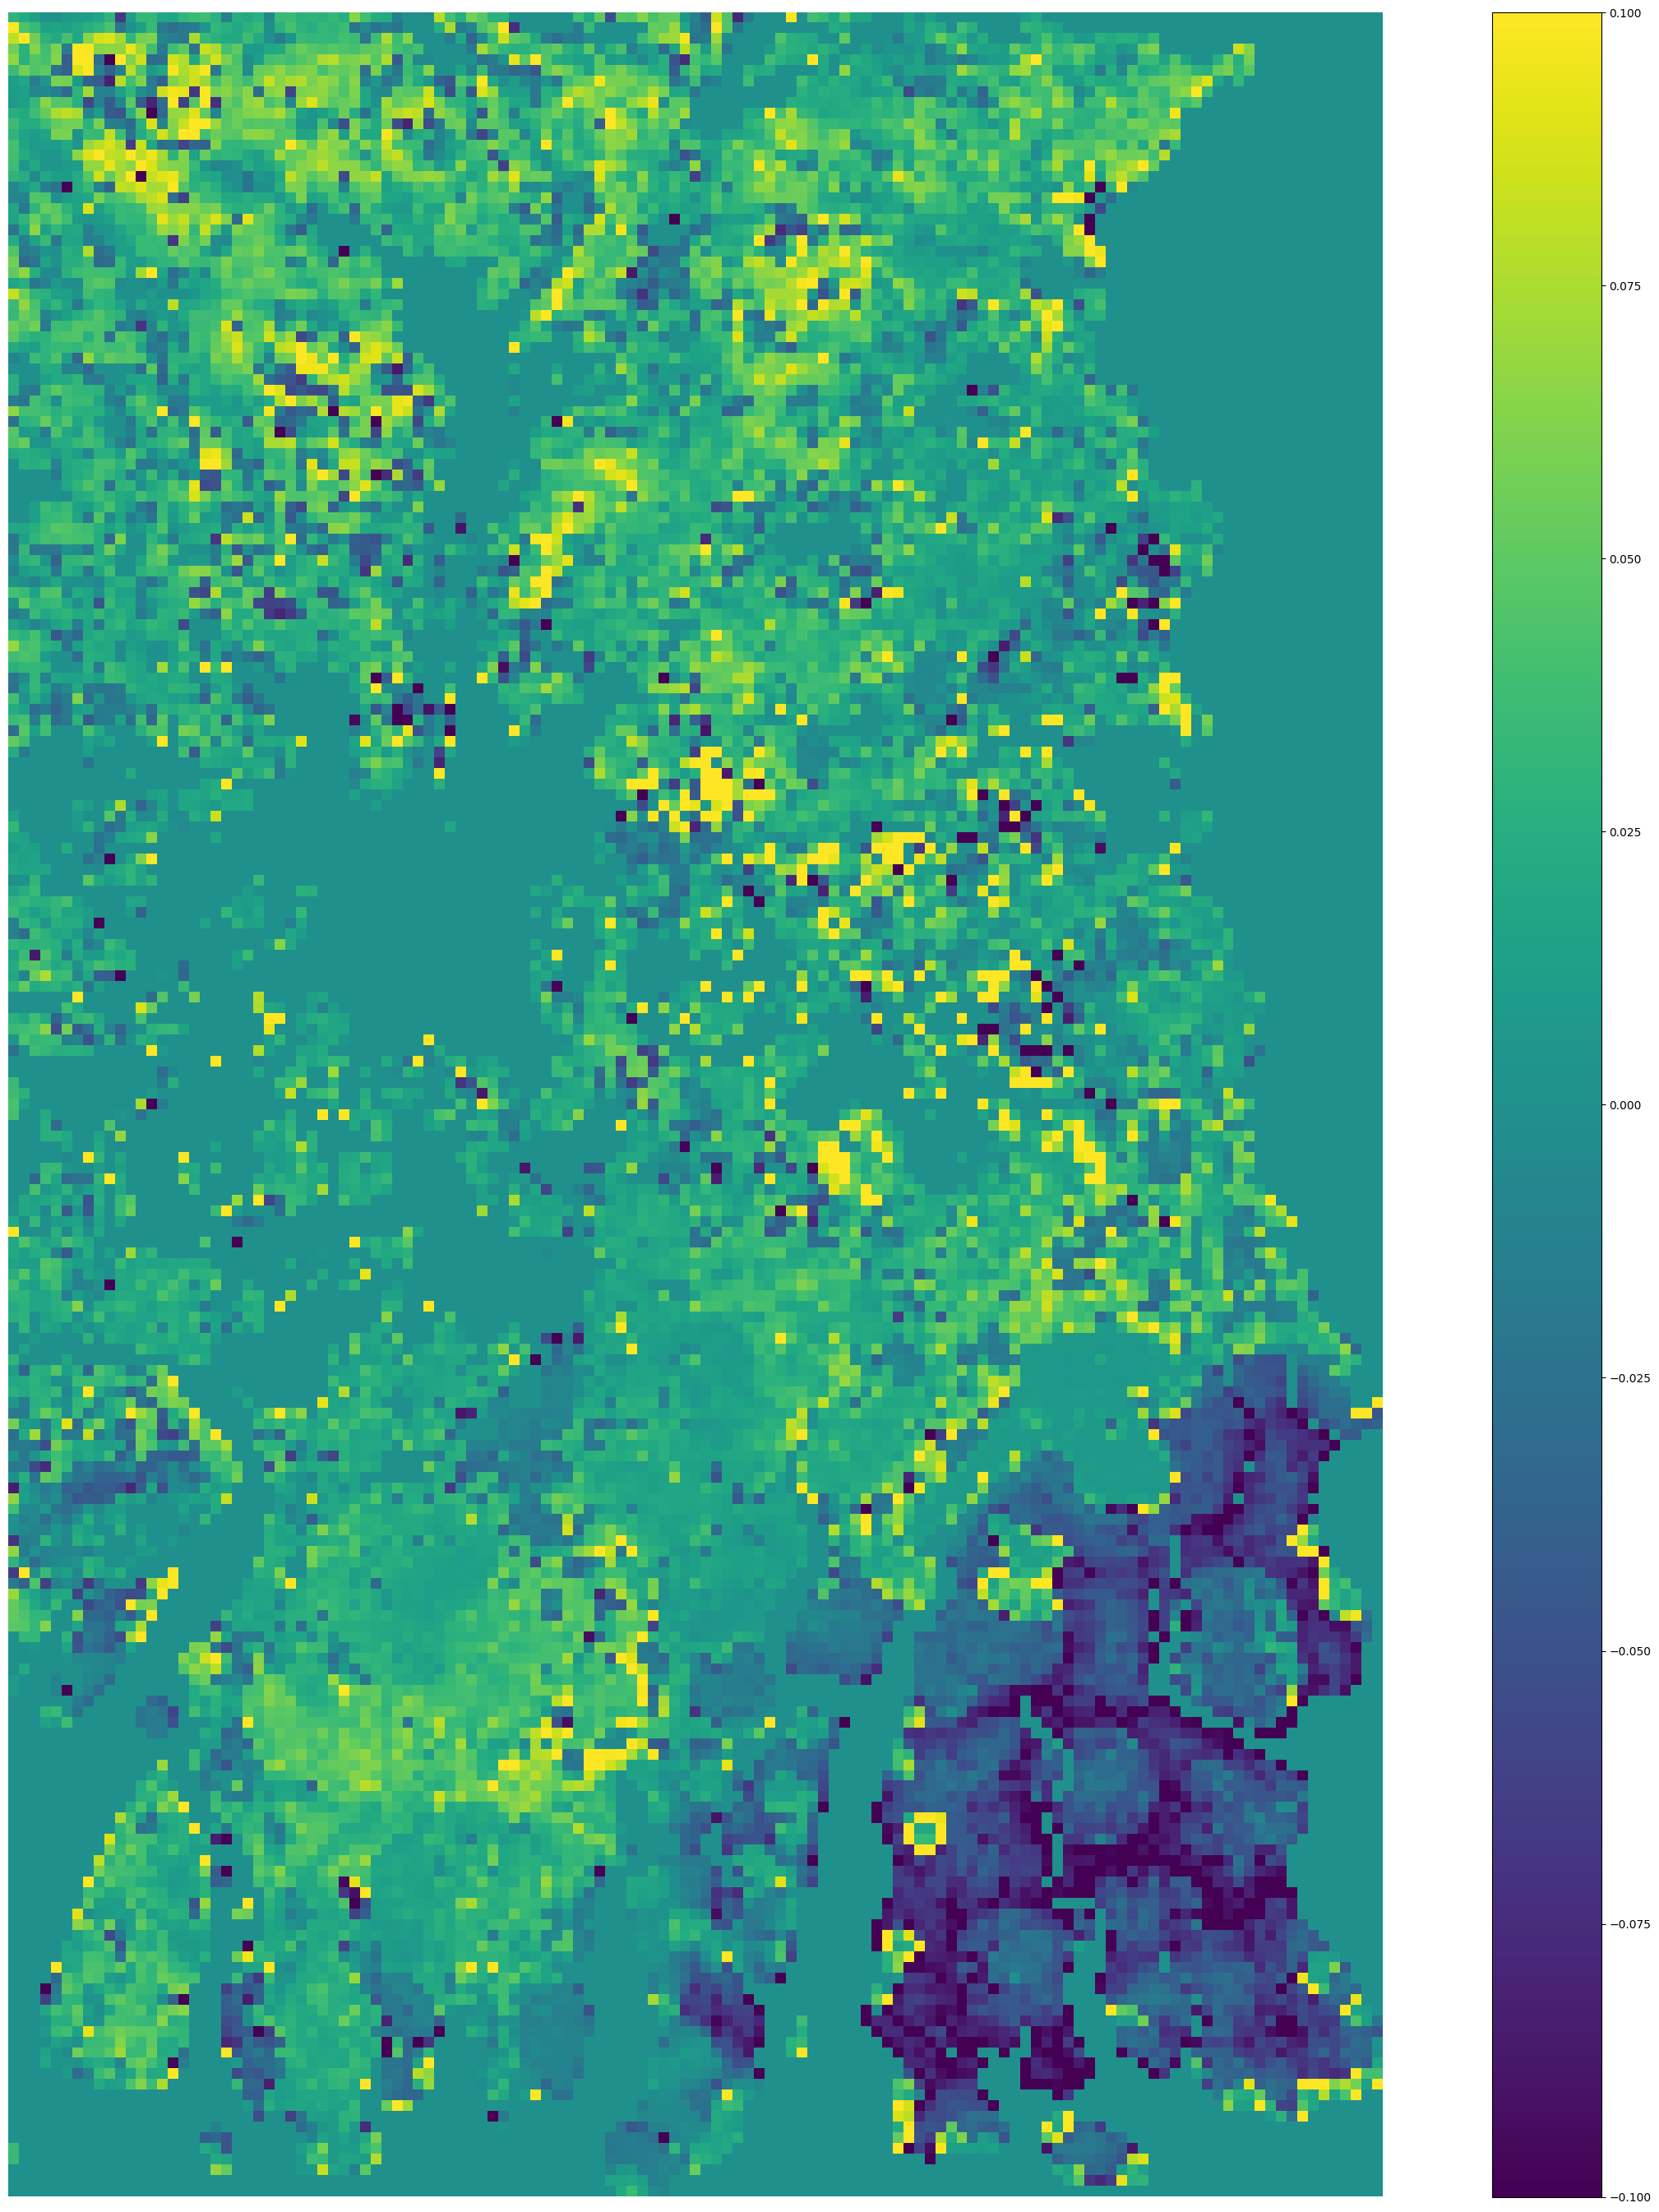

In [54]:
def get_normalized_image(image):
    return (image - image.min()) / (image.max() - image.min()).astype(np.float32)

def get_standardized_image(image):
    return (image - image.mean()) / image.std()

change = np.array(slopes)#
change = change.clip(-.1, .1) 
#change = change * 10
#change = get_standardized_image(change)# / .5
#plt.hist(change);
change = change.reshape((205, 129))
fig = plt.figure(figsize = (27, 27), layout = "tight")
plt.imshow(change)
plt.colorbar()
plt.axis("off")
fig.savefig(Path.home()/"Documents"/"climate_migration_project"/"change_with_colorbar.png")
#with rio.open(image_paths[0]) as ref:
    #with rio.open(DATA / "change.tif", 'w', **ref.meta) as tgt:
        #tgt.write(np.expand_dims(change, 0))
